Root Mean Square Error for M=0:247.0541643191767


<Figure size 360x360 with 0 Axes>

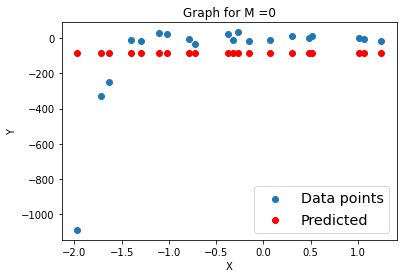

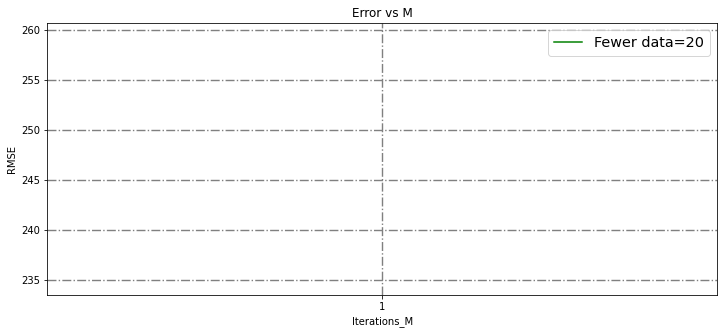

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from scipy.optimize import approx_fprime as gradient
import math
import csv

data_train=pd.read_csv('train_xy.csv')
data_test=pd.read_csv('test.csv')
data = np.array(data_train.values)  
X=data_train['x']
Y=data_train['y']
X_20=X.loc[0:19]
Y_20=Y.loc[0:19]

test_X=data_test['x']
test_Y=data_test['y']


# X_20.shape## As the dimension is 100, but linear regression trainning need atleast 1 dimension
# Y_20.shape
# X_20.ndim
# Y_20.ndim ## 1 ...Cant train linear regression model so we need to give dimension
x_train = X_20.values.reshape(-1,1)
y_train = Y_20.values.reshape(-1,1)
x_full = X.values.reshape(-1,1)
y_full = Y.values.reshape(-1,1)


x_test = test_X.values.reshape(-1,1) ## 30X1
y_test = test_Y.values.reshape(-1,1) ## 30X1


M=1
Mean_square_error=[]
design_matrix_20=[]
Coefficeint_20=[]
optimal_weights=[]
for i in range(M):
        polynomial_features = PolynomialFeatures(degree = i)
        X_poly = polynomial_features.fit_transform(x_train)
        design_matrix_20.append(X_poly)
        polynomial_reg_model_20=LinearRegression()
        polynomial_reg_model_20.fit(X_poly,y_train)
        Coefficeint_20.append(polynomial_reg_model_20.coef_)
        y_predicted = polynomial_reg_model_20.predict(X_poly)
        
        
        plt.figure(figsize=(5,5))
        fig, ax = plt.subplots()
        plt.title(f"Graph for M ={i}")
        plt.scatter(X_20,Y_20,label='Data points')
        plt.xlabel("X")
        plt.ylabel("Y")
        
        plt.scatter(X_20,y_predicted,label='Predicted',c="red")
        legend = ax.legend(loc='best', fontsize='x-large')
        plt.show
        MSE = mean_squared_error(Y_20, y_predicted)
        RMSE = math.sqrt(MSE)
        Mean_square_error.append(RMSE)
        print(f"Root Mean Square Error for M={i}:{RMSE}")
        
        #Optimisation(analystical_penrose_mooresir)
        design_matrix=X_poly
        transpose=np.transpose(design_matrix)
        dot_product=(np.dot(transpose,design_matrix))
        inverse=np.linalg.inv(dot_product)
        pseudo=np.dot(inverse,transpose)
        w_ml=np.dot(transpose,Y_20)
        optimal_weights.append(w_ml)



Iterations_M= (np.linspace(1,M,num=M,dtype="int"))
fig, ax = plt.subplots(figsize=(12,5))
plt.plot(Iterations_M, Mean_square_error, 'green',label='Fewer data=20')
plt.title("Error vs M")
plt.xlabel('Iterations_M')
plt.ylabel('RMSE')
plt.xticks(np.arange(1,M+1))
plt.grid(True, color = "grey", linewidth = "1.4", linestyle = "-.") 
legend = ax.legend(loc='best', fontsize='x-large')
plt.show()

Root Mean Square Error for M=0:298.8398296781834
Root Mean Square Error for M=1:237.58781279272927
Root Mean Square Error for M=2:231.6178705136389


<Figure size 360x360 with 0 Axes>

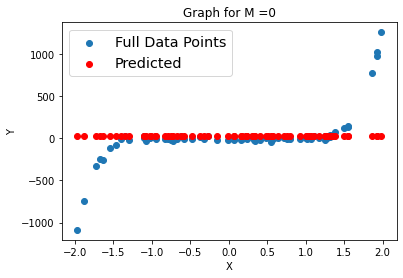

<Figure size 360x360 with 0 Axes>

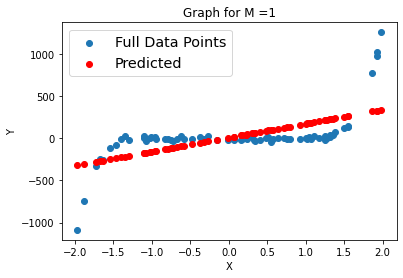

<Figure size 360x360 with 0 Axes>

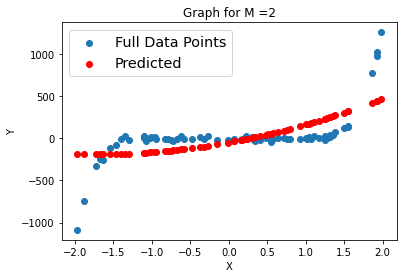

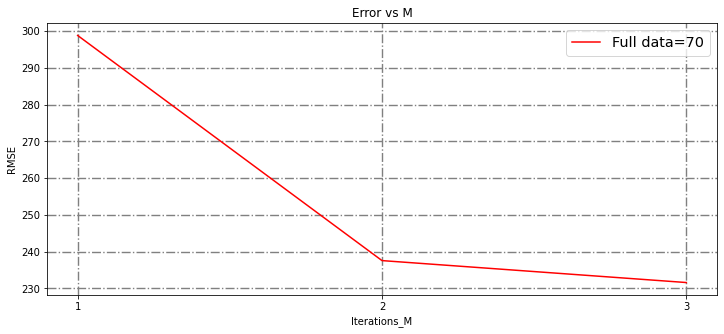

In [71]:
M=3
Mean_square_error_full=[]
design_matrix_70=[]
Coefficeint_70=[]

for i in range(M):
        polynomial_features = PolynomialFeatures(degree = i)
        X_poly_full = polynomial_features.fit_transform(x_full)
        
        polynomial_reg_model_70=LinearRegression()
        polynomial_reg_model_70.fit(X_poly_full,y_full)
        y_predicted_full = polynomial_reg_model_70.predict(X_poly_full)
        design_matrix_70.append(X_poly_full)
        Coefficeint_70.append( polynomial_reg_model_70.coef_)
        
        plt.figure(figsize=(5,5))
        fig, ax = plt.subplots()
        plt.title(f"Graph for M ={i}")
        plt.scatter(X,Y,label='Full Data Points')
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.scatter(X,y_predicted_full,label='Predicted',c="red")
        legend = ax.legend(loc='best', fontsize='x-large')
        plt.show
        MSE_full = mean_squared_error(Y, y_predicted_full)
        RMSE = math.sqrt(MSE_full)
        Mean_square_error_full.append(RMSE)
        print(f"Root Mean Square Error for M={i}:{RMSE}")
Iterations_M_full= (np.linspace(1,M,num=M,dtype="int"))
fig, ax = plt.subplots(figsize = (12, 5))
plt.plot(Iterations_M_full, Mean_square_error_full, 'red',label='Full data=70')
plt.title("Error vs M")
plt.xlabel('Iterations_M')
plt.ylabel('RMSE')
plt.xticks(np.arange(1,M+1))
plt.grid(True, color = "grey", linewidth = "1.4", linestyle = "-.") 
legend = ax.legend(loc='best', fontsize='x-large')
plt.show()

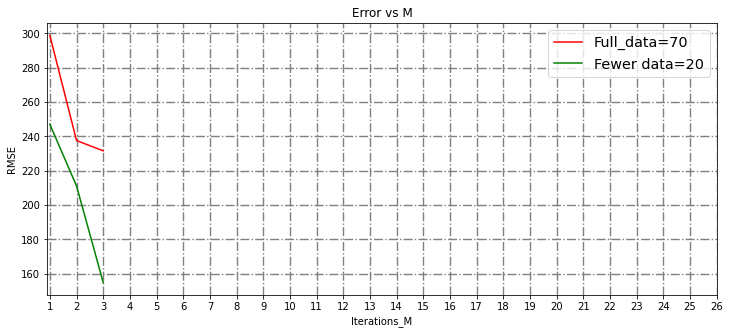

In [72]:

fig, ax = plt.subplots(figsize = (12, 5))
plt.plot(Iterations_M_full, Mean_square_error_full, 'red',label='Full_data=70')
plt.plot(Iterations_M, Mean_square_error, 'green',label='Fewer data=20')
plt.title("Error vs M")
plt.xlabel('Iterations_M')
plt.ylabel('RMSE')
M=26
plt.xticks(np.arange(1,M+1))
plt.grid(True, color = "grey", linewidth = "1.4", linestyle = "-.") 
legend = ax.legend(loc='best', fontsize='x-large')
plt.show()

In [73]:
with open('Design_matrix_20', 'w') as f:
      
    # using csv.writer method from CSV package
    write = csv.writer(f)
      
   
    write.writerows(design_matrix_20)

In [74]:
with open('Coefficient_20', 'w') as f:
      
    # using csv.writer method from CSV package
    write = csv.writer(f)
      
   
    write.writerows(Coefficeint_20)

In [75]:
with open('Design_matrix_70', 'w') as f:
      
    # using csv.writer method from CSV package
    write = csv.writer(f)
      
   
    write.writerows(design_matrix_70)
    

In [76]:
with open('Coefficient_70', 'w') as f:
      
    # using csv.writer method from CSV package
    write = csv.writer(f)
      
   
    write.writerows(Coefficeint_70)

In [77]:
## optimisation(Analytical)

In [78]:
def predict_moore_1(w_ml,x):## First Degrww polynomial
        y=w_ml[0]+w_ml[1]*x
        return y

def predict_moore_6(w_ml_6,x):## 6th degree polynomial
        y=w_ml_6[0]+w_ml_6[1]*x+w_ml_6[2]*x**2+w_ml_6[3]*x**3+w_ml_6[4]*x**4+w_ml_6[5]*x**5+w_ml_6[6]*x**6
        return y

def predict_moore_19(w_ml_19,x):## 6th degree polynomial
        y=w_ml_19[0]+w_ml_19[1]*x+w_ml_19[2]*x**2+w_ml_19[3]*x**3+w_ml_19[4]*x**4+w_ml_19[5]*x**5+w_ml_19[6]*x**6+w_ml_19[7]*x**7+w_ml_19[8]*x**8+w_ml_19[9]*x**9+w_ml_19[10]*x**10+w_ml_19[11]*x**11+w_ml_19[12]*x**12+w_ml_19[13]*x**13+w_ml_19[14]*x**14+w_ml_19[15]*x**15+w_ml_19[16]*x**16+w_ml_19[17]*x**17+w_ml_19[18]*x**18+w_ml_19[19]*x**19
        return y

In [79]:
polynomial_features_1 = PolynomialFeatures(degree = 1)
X_poly_1 = polynomial_features_1.fit_transform(x_train)
design_matrix_1=X_poly_1

transpose_1=np.transpose(design_matrix_1)
dot_product_1=(np.dot(transpose_1,design_matrix_1))
inverse_1=np.linalg.inv(dot_product_1)
pseudo_1=np.dot(inverse_1,transpose_1)
w_ml_1=np.dot(pseudo_1,Y_20)
w_ml_1

array([-28.5524439 , 135.44427729])

Root Mean Square Error for M=1:211.12447248939546


<Figure size 360x360 with 0 Axes>

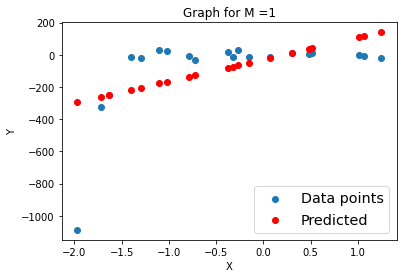

In [80]:
penrose_predict_1=predict_moore_1(w_ml_1,X_20)

plt.figure(figsize=(5,5))
fig, ax = plt.subplots()
plt.title(f"Graph for M ={1}")
plt.scatter(X_20,Y_20,label='Data points')
plt.xlabel("X")
plt.ylabel("Y")

plt.scatter(X_20,penrose_predict_1,label='Predicted',c="red")
legend = ax.legend(loc='best', fontsize='x-large')
plt.show
MSE__1 = mean_squared_error(Y_20, penrose_predict_1)
RMSE_1 = math.sqrt(MSE__1)

print(f"Root Mean Square Error for M=1:{RMSE_1}")

Root Mean Square Error for M=1:243.40052983453785


<Figure size 360x360 with 0 Axes>

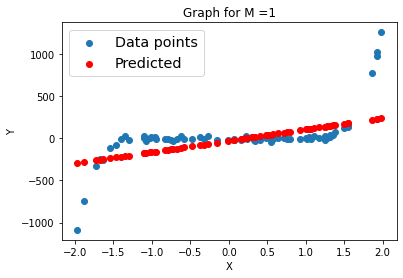

In [81]:
penrose_predict_full_1=predict_moore_1(w_ml_1,x_full)
plt.figure(figsize=(5,5))
fig, ax = plt.subplots()
plt.title(f"Graph for M ={1}")
plt.scatter(x_full,y_full,label='Data points')
plt.xlabel("X")
plt.ylabel("Y")

plt.scatter(x_full,penrose_predict_full_1,label='Predicted',c="red")
legend = ax.legend(loc='best', fontsize='x-large')
plt.show
MSE_1_full = mean_squared_error(y_full, penrose_predict_full_1)
RMSE_1_full = math.sqrt(MSE_1_full)

print(f"Root Mean Square Error for M=1:{RMSE_1_full}")

In [82]:
polynomial_features_6 = PolynomialFeatures(degree = 6)
X_poly_6 = polynomial_features_6.fit_transform(x_train)
design_matrix_6=X_poly_6

transpose_6=np.transpose(design_matrix_6)
dot_product_6=(np.dot(transpose_6,design_matrix_6))
inverse_6=np.linalg.inv(dot_product_6)
pseudo_6=np.dot(inverse_6,transpose_6)
w_ml_6=np.dot(pseudo_6,Y_20)
w_ml_6

array([  5.7955635 ,  19.61551805, -38.69318604, -38.39433489,
        69.87648563,  12.31423499, -32.0200864 ])

Root Mean Square Error for M=6:18.149825822102105
-1.892903611633301e-10 329.4161773726444


<Figure size 720x720 with 0 Axes>

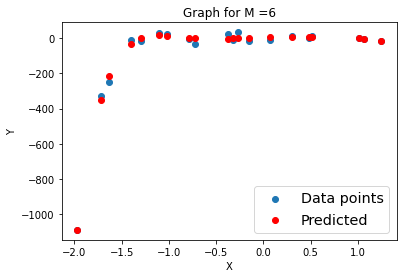

In [83]:

penrose_predict_6=predict_moore_6(w_ml_6,X_20)

plt.figure(figsize=(10,10))
fig, ax = plt.subplots()
plt.title(f"Graph for M ={6}")
plt.scatter(X_20,Y_20,label='Data points')
plt.xlabel("X")
plt.ylabel("Y")

plt.scatter(X_20,penrose_predict_6,label='Predicted',c="red")
legend = ax.legend(loc='best', fontsize='x-large')
plt.show
MSE_6 = mean_squared_error(Y_20, penrose_predict_6)
RMSE_6 = math.sqrt(MSE_6)

print(f"Root Mean Square Error for M=6:{RMSE_6}")


noise=Y_20-penrose_predict_6


mean_noise=sum(noise)/20
noise_variance=sum((noise)**2)/20

print(mean_noise,noise_variance)

In [84]:
polynomial_features_19 = PolynomialFeatures(degree = 19)
X_poly_19 = polynomial_features_19.fit_transform(x_train)
design_matrix_19=X_poly_19

transpose_19=np.transpose(design_matrix_19)
dot_product_19=(np.dot(transpose_19,design_matrix_19))
inverse_19=np.linalg.inv(dot_product_19)
pseudo_19=np.dot(inverse_19,transpose_19)
w_ml_19=np.dot(pseudo_19,Y_20)
w_ml_19

array([ -136577.15536861,  -361611.4684464 ,  -155730.80025866,
         131782.57689545,  -361013.01326207,   312081.29833258,
        3121804.55934214,   242945.49883476, -8222051.71025179,
       -4190545.30742703,  9702788.10912674,  8320118.30777379,
       -4386317.57441502, -6448269.95280769,  -288905.76566062,
        1943450.80972199,   642871.19502776,  -108716.80966381,
         -80202.7517971 ,    -9752.71881239])

Root Mean Square Error for M=6:6201182527.298896
2005997508.9033732 3.845466473687711e+19


<Figure size 720x720 with 0 Axes>

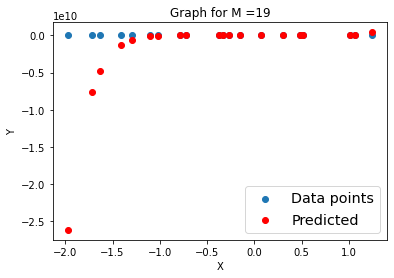

In [85]:
w_ml_19=[ 0.00000000e+00,  1.97757233e+03,  6.36815116e+04,  1.35462572e+05,
 -9.94087363e+05, -3.29895804e+06 , 3.66313964e+06  ,2.23732180e+07,
  7.55194403e+06 ,-5.77971042e+0, -6.31601473e+07  ,4.41799998e+07,
  1.03465662e+08  ,2.27930819e+07, -5.71759295e+07, -4.07628690e+07,
  1.91633870e+06, 1.17610678e+07,  4.65505318e+06 , 5.99271999e+05]
penrose_predict_19=predict_moore_19(w_ml_19,X_20)

plt.figure(figsize=(10,10))
fig, ax = plt.subplots()
plt.title(f"Graph for M ={19}")
plt.scatter(X_20,Y_20,label='Data points')
plt.xlabel("X")
plt.ylabel("Y")

plt.scatter(X_20,penrose_predict_19,label='Predicted',c="red")
legend = ax.legend(loc='best', fontsize='x-large')
plt.show
MSE_19 = mean_squared_error(Y_20, penrose_predict_19)
RMSE_19 = math.sqrt(MSE_19)

print(f"Root Mean Square Error for M=6:{RMSE_19}")


noise19=Y_20-penrose_predict_19


mean_noise19=sum(noise19)/20
noise_variance19=sum((noise19)**2)/20

print(mean_noise19,noise_variance19)

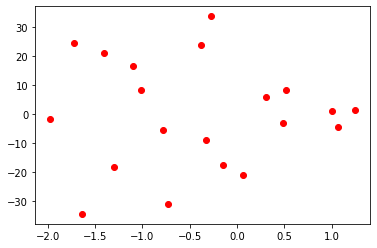

In [86]:
plt.scatter(X_20,noise,label='Predicted',c="red")

In [2]:
df = pd.read_csv("train.csv", header=None)
# df = df.sample(n = len(df))
df = df.sample(n=70)



data = np.array(df.values)
# norm = np.linalg.norm(data[:, 0:1])
# data[:, 0:1] = data[:, 0:1]/norm
# v = data[:, 0:1]
# kk = ((v - v.min()) / (v.max() - v.min()))
# data[:, 0:1] = kk - np.mean(kk)
# Convert everything to a numpy array, as it makes my life easy. Works pretty much like MATLAB after that
train_split = 0.8
train_X_st = data[:int(train_split*len(df)), 0:1].reshape(-1,1)
train_y_st = data[:int(train_split*len(df)), 1:].reshape(-1,1)
test_X_st = data[int(train_split*len(df)):, 0:1]
test_y_st = data[int(train_split*len(df)):, 1:]
print(train_X_st.shape)

(56, 1)


In [136]:
def eval_2nd_degree(coeffs, x):
        a = (coeffs[0]*(x*x))
        b = coeffs[1]*x
        c = coeffs[2]
        y = a+b+c
        return y
        
def loss_mse(ys, y_bar):
    
    mse=sum((ys - y_bar)*(ys - y_bar)) / len(ys)
    RMSE=np.sqrt(mse)
    return RMSE
  

def calc_gradient_2nd_poly(rand_coeffs, hundred_xs, ys): 
   
    a_s = []
    b_s = []
    c_s = []
    
    
    y_bars = eval_2nd_degree(rand_coeffs, hundred_xs)
    
    for x,y,y_bar in list(zip(hundred_xs, ys, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_squared = x**2
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y-y_bar)
        b_s.append(partial_b)
        partial_c = (y-y_bar)
        c_s.append(partial_c)
    
    num = [i for i in y_bars]
    n = len(num)
    
    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)
    return(gradient_a, gradient_b, gradient_c) 

In [148]:
# Updating for single iteration
calc_grad = calc_gradient_2nd_poly(coeffs, train_X_st,train_y_st)
coeffs = [20, -20, 30] ## Initial starting with these coefficients
predict_single=eval_2nd_degree(coeffs,train_X_st)

In [149]:
# Updated model coefficient
lr = 0.0001
a_new = coeffs[0] - lr * calc_grad[0]
b_new = coeffs[1] - lr * calc_grad[1]
c_new = coeffs[2] - lr * calc_grad[2]

new_model_coeffs = (a_new, b_new, c_new)
print(f"New model coeffs: {new_model_coeffs}")
print("")

#update with these new coeffs:
new_y_bar = eval_2nd_degree(new_model_coeffs, train_X_st)
updated_model_loss = loss_mse(predict_single, new_y_bar)

print(f"your model loss: {updated_model_loss}")

New model coeffs: (array([20.02508381]), array([-19.96157596]), array([30.00582562]))

your model loss: [0.06426283]


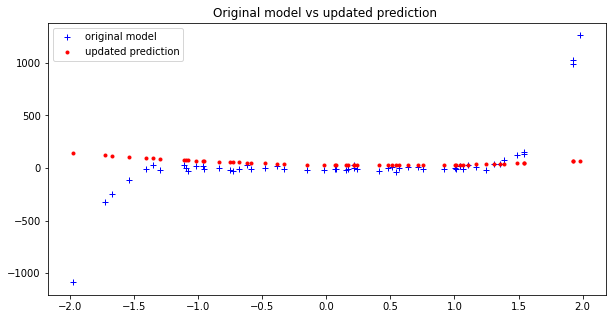

In [150]:
plt.figure(figsize=(10,5))
plt.plot(train_X_st, train_y_st, 'b+', label = 'original model')
# plt.plot(train_X_st, , 'ro', label = 'first prediction')
plt.plot(train_X_st, new_y_bar, 'r.', label = 'updated prediction')
plt.title('Original model vs updated prediction ')
plt.legend()
plt.show()

In [151]:
def calc_gradient_2nd_poly_for_GD(coeffs, inputs_x, outputs_y, lr): 
    """
    calculates the gradient for a second degree polynomial.
    
    Args:
        coeffs: a,b and c, for a 2nd degree polynomial [ y = ax^2 + bx + c ]
        inputs_x: x input datapoints
        outputs_y: actual y output points
        lr: learning rate
        
    Returns: Calculated gradients for the 2nd degree polynomial, as a tuple of its parts for a,b,c respectively.
    
    """
    a_s = []
    b_s = []
    c_s = []
        
    y_bars = eval_2nd_degree(coeffs, inputs_x)

    for x,y,y_bar in list(zip(inputs_x, outputs_y, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_squared = x**2        
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y-y_bar)
        b_s.append(partial_b)
        partial_c = (y-y_bar)
        c_s.append(partial_c)
    
    num = [i for i in y_bars]
    n = len(num)
    
    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)


    a_new = coeffs[0] - lr * gradient_a
    b_new = coeffs[1] - lr * gradient_b
    c_new = coeffs[2] - lr * gradient_c
    
    new_model_coeffs = (a_new, b_new, c_new)
    
    #update with these new coeffs:
    new_y_bar = eval_2nd_degree(new_model_coeffs, inputs_x)
    
    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar

In [152]:
def gradient_descent(epochs, lr):
  
# Perform gradient descent for a second degree polynomial.
    losses = []
    rand_coeffs_to_test = coeffs
    for i in range(epochs):
        loss = calc_gradient_2nd_poly_for_GD(rand_coeffs_to_test,train_X_st, train_y_st, lr)
        rand_coeffs_to_test = loss[1]
        losses.append(loss[0])
    # print(losses)
    return loss[0], loss[1], loss[2], losses  #(loss[0]=updated_model_loss, loss[1]=new_model_coeffs, loss[2]=new_y_bar,losses= saved loss updates)
GD = gradient_descent(3000, 0.0001)

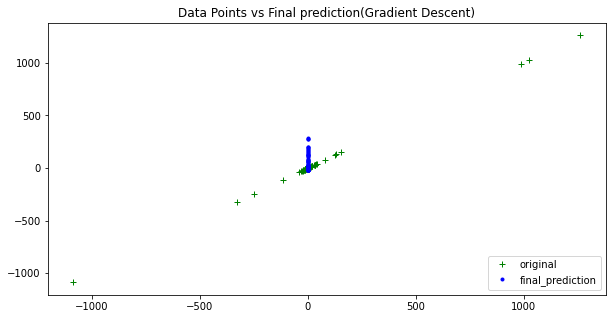

In [153]:
plt.figure(figsize=(10,5))
plt.plot(train_y_st, train_y_st, 'g+', label = 'original')
plt.plot(train_X_st, GD[2], 'b.', label = 'final_prediction')
plt.title('Data Points vs Final prediction(Gradient Descent)')
plt.legend(loc="lower right")
plt.show()

In [154]:
print(f"Final Coefficients predicted: {GD[1]}")
print(f"Original Coefficients: {coeffs}")

Final Coefficients predicted: (array([35.89843761]), array([66.93409364]), array([14.83815729]))
Original Coefficients: [20, -20, 30]


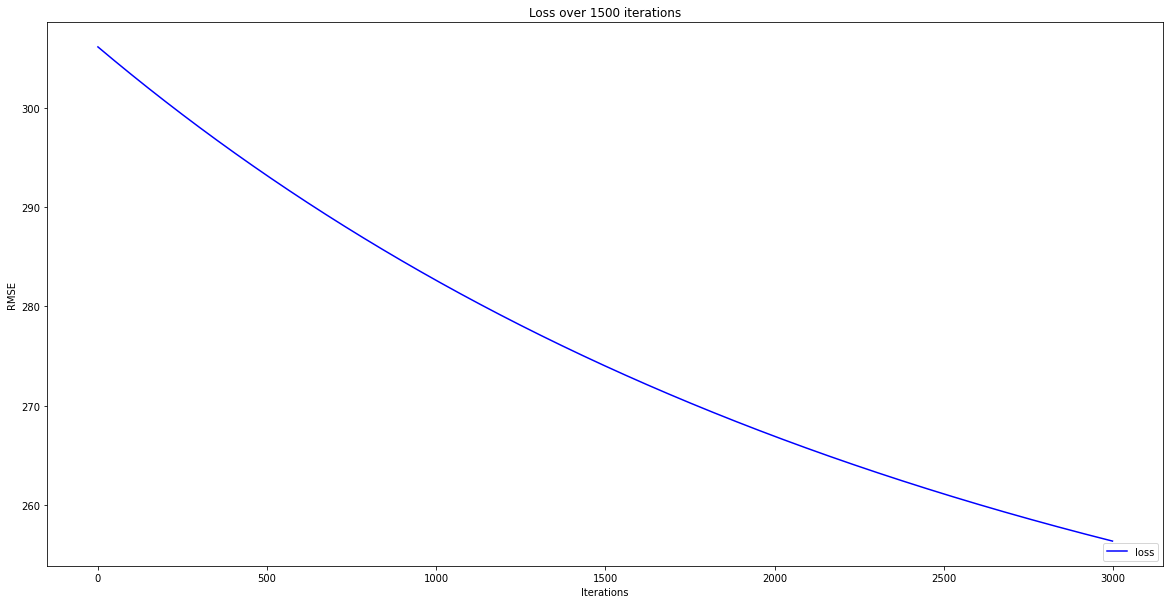

In [155]:
plt.figure(figsize=(20,10))
plt.plot(GD[3], 'b-', label = 'loss')
plt.title('Loss over 1500 iterations')
plt.legend(loc="lower right")
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.show()

In [308]:
class polynomial_regression():


    def __init__(self,degrees):
        self.degree = degrees
        self.weights = np.random.randn(degrees+1)
        self.training_loss = []
        self.loss_type = None


    def predict(self, x: float):
        output = 0

        for i in range(len(self.weights)-1):
            output += (x**(i+1) * self.weights[i])

        return output + self.weights[-1]


    def fit(self,X,y,epochs,lr,loss,ridge=False,reg_rate=0.1):

        training_loss = []

        if loss == 'MSE':
            loss = MSE
            self.loss_type = 'MSE'
        elif loss == 'RMSE':
            loss = RMSE
            self.loss_type = 'RMSE'
        else:
            raise Exception('Undefined loss function')


        for epoch in range(epochs):
           
            self.weights -= lr*gradient(self.weights,
                                        RMSE,
                                        [np.sqrt(np.finfo(float).eps)/100]*len(self.weights),
                                        X,
                                        y,
                                        ridge,
                                        reg_rate
                                       )
            training_loss.append(MSE(self.weights,X,y))
            # print(training_loss)

        self.training_loss = training_loss
        # print(self.weights)

def MSE(w,X,y,ridge=False,reg_rate=0.1):
    total = 0
    weights = w[:-1]
    bias = w[-1]

    for i in range(len(X)):
        total += (np.dot(weights,[X[i]**(p+1) for p in range(len(weights))]) + bias - y[i])**2

    if ridge == False:
        return (1/len(X)) * total
    else:
        return (1/len(X)) * total + reg_rate*((w**2).sum())


def RMSE(w,X,y,ridge=False, reg_rate = 0.1):
    total = 0
    weights = w[:-1]
    bias = w[-1]

    for i in range(len(X)):
        total += (np.dot(weights,[X[i]**(p+1) for p in range(len(weights))]) + bias - y[i])**2

    if ridge == False:
        return np.sqrt((1/len(X)) * total)

    else:
        return np.sqrt((1/len(X)) * total) + reg_rate*((w**2).sum())


def build_graph(X,y,model):
    plt.figure(figsize=(10,4))

    #Scatter plot of the dataset and the plot of the model's predictions
    plt.subplot(1,2,1)
    plt.scatter(X,y)
    X.sort()
    plt.scatter(X,model.predict(X),c='red')
    plt.title('Model',size=20)
    plt.show
    #Curve of the training loss
    plt.subplot(1,2,2)
    plt.plot(np.arange(len(model.training_loss)),model.training_loss,label=f'{model.loss_type} loss')
    plt.legend(prop={'size': 20})
    plt.title('Training loss',size=20)

In [313]:
epoch_Iter=np.linspace(1000,10000,10)
epoch_Iter
iteration_epoch=[]
for i in (epoch_Iter):
        print(int(i))
        iteration_epoch.append(int(i))


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000


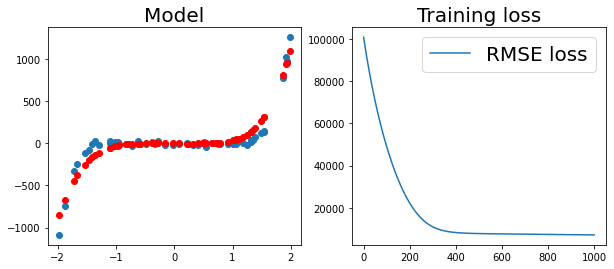

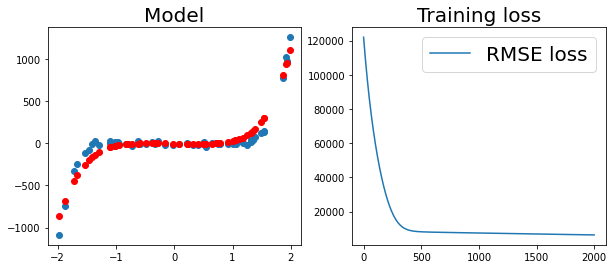

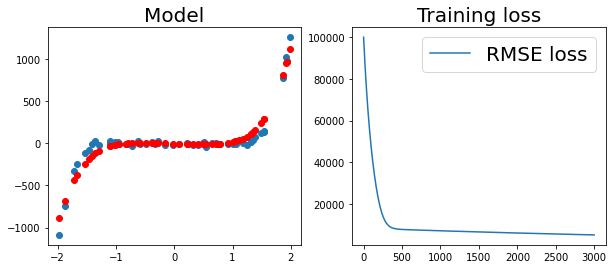

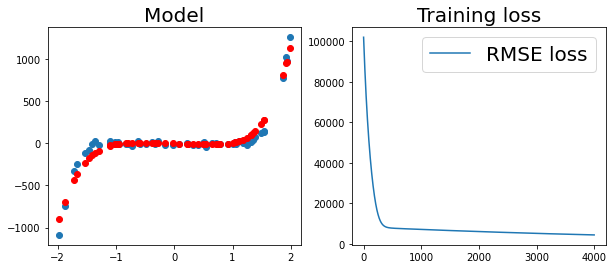

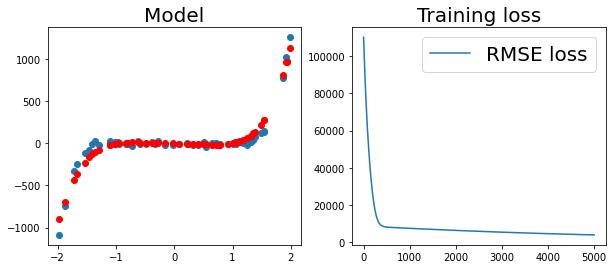

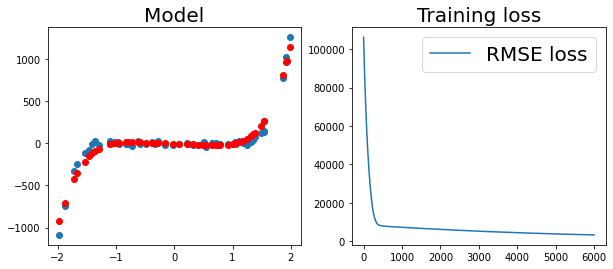

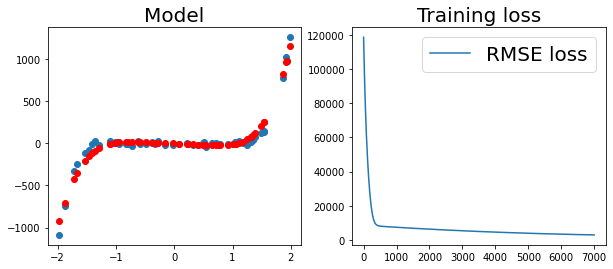

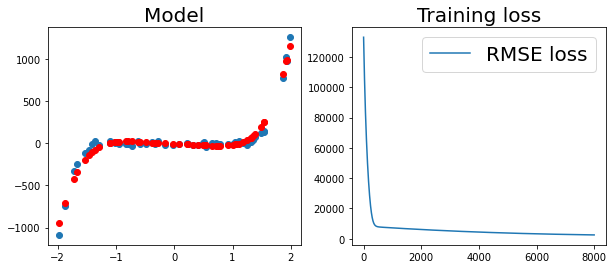

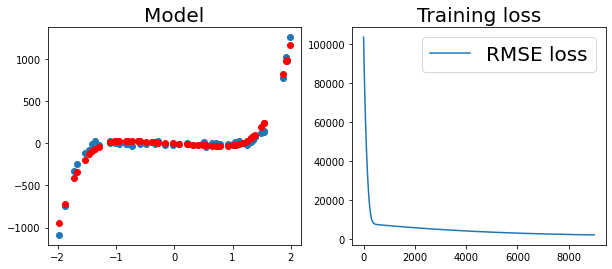

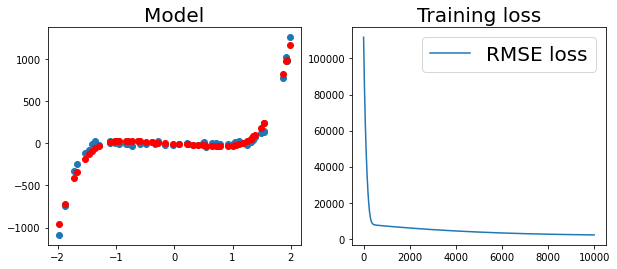

In [311]:
for i in iteration_epoch:
        degree = 6
        epochs = i
        print(i)
        learning_rate = 0.01


        model = polynomial_regression(degree)
        model.fit(train_X_st,
                train_y_st,
                epochs,
                learning_rate,
                loss='RMSE',
                )
        build_graph(train_X_st,train_y_st,model)


In [13]:
text = open("train.csv", "r")
  
# joining with space content of text
text = ' '.join([i for i in text])  
  
# replacing ',' by space
text = text.replace(",", " ")  
  
#displaying result
print(text)

1.24561 -16.990928
 -1.016511 20.553527
 0.305252 13.661091
 -1.104524 30.84529
 -0.785528 -4.921309
 0.486322 2.584267
 -1.720929 -327.121332
 -0.150237 -15.405934
 1.065645 -7.880427
 -0.272616 32.516125
 -1.405794 -12.225883
 -1.972946 -1088.04946
 -0.326951 -11.719795
 1.006105 -0.388933
 0.067061 -13.903931
 -1.298048 -19.376775
 -1.634338 -251.687317
 -0.727636 -32.855243
 0.514267 13.351858
 -0.379221 20.188061
 -0.013818 -21.157341
 0.547429 -39.589136
 1.543718 131.597931
 -0.949766 -11.342748
 0.40868 -24.819831
 1.171842 6.024396
 1.546479 151.538931
 1.27636 9.966083
 0.220737 0.344591
 0.569384 -3.751662
 0.327909 -24.904466
 0.340524 -34.400811
 1.922354 1025.052114
 1.98202 1261.789936
 0.169355 -12.060431
 1.866536 783.144745
 -1.460871 -77.756928
 0.158308 -15.000755
 1.105134 31.141472
 -1.019045 2.686776
 -0.833894 -1.707192
 0.712574 6.040495
 -0.678882 -13.136848
 1.252737 33.023544
 0.753274 -7.691133
 0.921398 -12.962827
 -1.879306 -740.050971
 1.309901 41.2336
 

In [48]:

data_points =pd.read_csv('train_xy.csv')
#print(data_points)
n = (len(data_points))
col_t = np.array(data_points['x']).reshape((n,1))
col_x = np.array(data_points['y']).reshape((n,1))

# holds  20 data points
p = int(len(data_points)*9/10)
text_x =col_x[:p]
text_t =col_t[:p]
# holds 20-100 data points
tp_x = col_x[p:]
tp_t = col_t[p:]

#data holds the values from 0-99 such that data[i]=i
data = np.arange(p)
#shuffles the data 
np.random.shuffle(data)

In [49]:
def stochastic_gradient_descent(eta,m,lamb,max_iter,batch_size,col_x,col_t):
    #constructing design_matrix
    P  = design_matrix(col_x,m)
    #initializing matrix with all zeros
    weight = np.zeros((m+1,1))
    
    for i in range(max_iter):
        iter = 0
        for j in range(batch_size):
          y = col_t[data[j]]
          x = P[data[j]] 
          r = x*weight
          iter = iter  + (x.T)*(y-r)
          weight = weight + iter*eta  
        weight = weight + lamb*weight*eta  
    return weight

In [50]:
def design_matrix(x,m):
    n = len(x)
    
    #initializing matrix with all zeros
    Pi = np.matrix(np.zeros((n,m+1),dtype=float))
    
    for j in range(n): 
      for i in range(m+1):
        Pi[j,i] = (x[j])**i
    return Pi

def error(m,cofficent,x,t):
    tp   = result(m,cofficent,x)
    test = np.square((np.subtract(t,tp)))
    Erms = ((np.sum(test))/len(t))**0.5
    return Erms

def result(m,cofficient,col_x):

    return (np.matmul(design_matrix(col_x,m),cofficient))

In [51]:
#sgd method of optimization
#eta = learning rate
#lamb = lamda
#m = order of poly
#batch_size = batch size to be taken
stochastic_gradient_descent(1/1000,6,10**-20,1000,1,train_X_st,train_y_st)

matrix([[-6.95914962e+177],
        [-1.29895033e+178],
        [-2.42453755e+178],
        [-4.52548663e+178],
        [-8.44698371e+178],
        [-1.57665992e+179],
        [-2.94289250e+179]])

C:\Users\rahma\AppData\Local\Temp\ipykernel_15356\2816482029.py:14: RuntimeWarning: invalid value encountered in add
  weight = weight + iter*eta


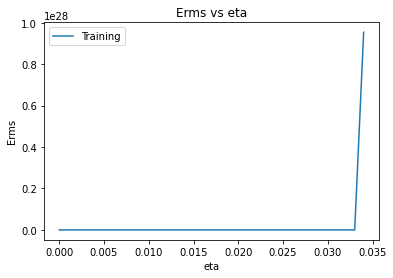

In [52]:
maty = np.zeros((100,2))
for i in range(100):
    maty[i][0] = i/1000
    maty[i][1]=  error(3,stochastic_gradient_descent(i/1000,3,10**-20,20000,1,train_X_st,train_y_st),train_X_st,train_y_st)
    
fig = plt.figure(5)
plt.plot(maty[:,0:1],maty[:,1:2],label = 'Training')
plt.xlabel('eta')
plt.ylabel('Erms')
plt.title('Erms vs eta')
plt.legend()
plt.show()

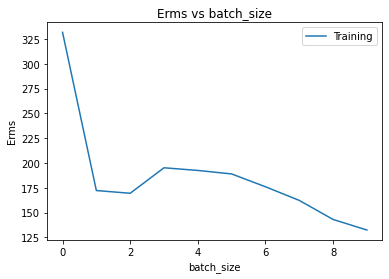

In [53]:
maty = np.zeros((10,2))
for i in range(10):
    maty[i][0] = i
    maty[i][1]=  error(3,stochastic_gradient_descent(0.0001,3,10**-20,5000,i,train_X_st,train_y_st),train_X_st,train_y_st)
    
fig = plt.figure(6)
plt.plot(maty[:,0:1],maty[:,1:2],label = 'Training')
plt.xlabel('batch_size')
plt.ylabel('Erms')
plt.title('Erms vs batch_size')
plt.legend()
plt.show()

In [ ]:
# stocastic mini batch

In [54]:
# holds  70 data points
p = int(len(x_full)*9/10)
data = np.arange(p)
#shuffles the data 
np.random.shuffle(data)

In [55]:
def stochastic_gradient_descent(eta,m,lamb,max_iter,batch_size,col_x,col_t):
    #constructing design_matrix
    P  = design_matrix(col_x,m)
    #initializing matrix with all zeros
    weight = np.zeros((m+1,1))
    
    for i in range(max_iter):
        iter = 0
        for j in range(batch_size):
          y = col_t[data[j]]
          x = P[data[j]] 
          r = x*weight
          iter = iter  + (x.T)*(y-r)
          weight = weight + iter*eta  
        weight = weight + lamb*weight*eta  
    return weight

In [56]:
def design_matrix(x,m):
    n = len(x)
    
    #initializing matrix with all zeros
    Pi = np.matrix(np.zeros((n,m+1),dtype=float))
    
    for j in range(n): 
      for i in range(m+1):
        Pi[j,i] = (x[j])**i
    return Pi

def error(m,cofficent,x,t):
    tp   = result(m,cofficent,x)
    test = np.square((np.subtract(t,tp)))
    Erms = ((np.sum(test))/len(t))**0.5
    return Erms

def result(m,cofficient,col_x):

    return (np.matmul(design_matrix(col_x,m),cofficient))

In [58]:
weight=stochastic_gradient_descent(1/1000,6,10**-20,1000,1,x_full,y_full)
weight

matrix([[-6.95914962e+177],
        [-1.29895033e+178],
        [-2.42453755e+178],
        [-4.52548663e+178],
        [-8.44698371e+178],
        [-1.57665992e+179],
        [-2.94289250e+179]])

In [ ]:
maty = np.zeros((100,2))
for i in range(100):
    maty[i][0] = i/1000
    maty[i][1]=  error(3,stochastic_gradient_descent(i/1000,3,10**-20,20000,1,x_full,y_full),x_full,y_full)
    
fig = plt.figure(5)
plt.plot(maty[:,0:1],maty[:,1:2],label = 'Training')
plt.xlabel('eta')
plt.ylabel('RMSE')
plt.title('RMSE vs eta')
plt.legend()
plt.show()

In [ ]:
maty = np.zeros((10,2))
for i in range(10):
    maty[i][0] = i
    maty[i][1]=  error(3,stochastic_gradient_descent(0.0001,3,10**-20,5000,i,x_full,y_full),x_full,y_full)
    
fig = plt.figure(6)
plt.plot(maty[:,0:1],maty[:,1:2],label = 'Training')
plt.xlabel('batch_size')
plt.ylabel('RMSE')
plt.title('RMSE vs batch_size')
plt.legend()
plt.show()

In [ ]:
pred_batch=list(result(6,weight,x_test))
plt.scatter((x_test),pred_batch,c='r')
plt.scatter(x_test,y_test,c='b')

In [ ]:
wt_mini=[]
error_mse=[]
prediction_mini=[]
for i in iteration_epoch:
        epo=i
        wt_iteration=stochastic_gradient_descent(1/1000,6,10**-20,epo,50,x_full,y_full)
        # error_iteration=error(6,wt_iteration,x_full,y_full)
        pred_batch=list(result(6,wt_iteration,x_test))
        wt_mini.append(wt_iteration)
        # error_mse.append(error_iteration)
        prediction_mini.append(pred_batch)

        print(wt_iteration)
        plt.figure(figsize=(5,5))
        fig, ax = plt.subplots()
        plt.title(f"Graph for M =6")
        plt.scatter(x_test,y_test,label='Data points')
        plt.xlabel("X")
        plt.ylabel("Y")
        
        plt.scatter(x_test,pred_batch,label='Predicted',c="red")
        legend = ax.legend(loc='best', fontsize='x-large')
        plt.show


In [ ]:
pred_batch=list(result(4,weight,x_test))
plt.scatter((x_test),pred_batch,c='r')
plt.scatter(x_test,y_test,c='b')